In [1]:
from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig
from asgardpy.utils.plot import (
    plot_parameter_stat_profile,
    plot_spectrum_fp,
    plot_spectrum_model
)
from gammapy.modeling.models import Models, create_crab_spectral_model

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, norm
import astropy.units as u

import copy


In [2]:
base_dir = "/fefs/aswg/workspace/chaitanya.priyadarshi/"
config_file = base_dir + "analyze_pg1553_full.yaml"
output_dir = base_dir + "real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/"

In [3]:
config = AsgardpyConfig()

In [4]:
config_main = config.read(config_file)

In [5]:
for g in config_main.general:
    print(g)

('log', LogConfig(level='info', filename=None, filemode=None, format=None, datefmt=None))
('outdir', '/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/')
('n_jobs', 1)
('steps', [<AnalysisStepEnum.datasets_3d: 'datasets-3d'>, <AnalysisStepEnum.datasets_1d: 'datasets-1d'>, <AnalysisStepEnum.fit: 'fit'>, <AnalysisStepEnum.flux_points: 'flux-points'>])
('overwrite', True)
('stacked_dataset', True)


# Steps mentioned in the main config file

In [6]:
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>,
 <AnalysisStepEnum.fit: 'fit'>,
 <AnalysisStepEnum.flux_points: 'flux-points'>]

In [7]:
# Select first only the joint datasets creation and getting the final model object
config_main.general.steps = ["datasets-3d", "datasets-1d"]
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>]

# Target source information

In [8]:
print(config_main.target.source_name, config_main.target.sky_position)

for c in config_main.target.components.spectral:
    print(c)
for c in config_main.target.components.spatial:
    print(c)

PG1553+113 frame=<FrameEnum.icrs: 'icrs'> lon=<Angle 238.92934976 deg> lat=<Angle 11.19010155 deg>
('model_name', 'LogParabola')
('type', 'LogParabolaSpectralModel')
('parameters', [ModelParams(name='amplitude', value=8.2e-06, unit='cm-2 s-1 TeV-1', error=1.5e-06, min=0.0, max=0.01, frozen=False), ModelParams(name='reference', value=0.01, unit='TeV', error=0.0, min=0.001, max=100.0, frozen=True), ModelParams(name='alpha', value=1.5, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.1, unit='', error=0.01, min=0.0, max=1.0, frozen=False)])
('ebl_abs', EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.433, alpha_norm=1.0))
('model_name', None)
('type', None)
('parameters', [ModelParams(name=None, value=None, unit=None, error=None, min=None, max=None, frozen=True)])


# Datasets informations

In [9]:
for cc in config_main.dataset3d:
    print(cc)
for cc in config_main.dataset1d:
    print(cc)

('type', <ReductionTypeEnum.cube: '3d'>)
('instruments', [Dataset3DBaseConfig(name='Fermi-LAT', io=[InputConfig(type='lat', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola'), glob_pattern={'events': '*MkTime.fits*', 'edisp': '*LogParabola*eDRM.fits*', 'xml_model': '*out.xml', 'exposure': '*BinnedMap.fits*', 'psf': '*psf.fits*'}), InputConfig(type='lat-aux', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models'), glob_pattern={'diffuse': 'gll_iem_v07.fits*', 'iso': 'iso_P8R3_SOURCE_V3_*.txt'})], dataset_info=Dataset3DInfoConfig(name='Fermi-LAT', key=['FRONT', 'BACK'], map_selection=[<MapSelectionEnum.counts: 'counts'>, <MapSelectionEnum.exposure: 'exposure'>, <MapSelectionEnum.background: 'background'>, <MapSelectionEnum.psf: 'psf'>, <MapSelectionEnum.edisp: 'edisp'>], obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start=<Time object: scale='utc' format='iso' value=2021-

In [10]:
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


# Run the steps to create the joint dataset and get the final model

In [11]:
%%time
analysis.run()

1 number of 3D Datasets given
The different keys used: ['FRONT', 'BACK']
The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_MkTime.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_MkTime.fits.gz')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_LogParabola_eDRM.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_LogParabola_eDRM.fits.gz')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files for LAT selected: [PosixPath('/fefs/aswg/wor

Observation ID list selected: [4333 4334 4335 4336 4343 4344 4363 4364 4365 4366 4367 4368 4514 4515
 4652 4653 4654 4902 4903 4904 4905 4930 4940 4941 4942 4943 7153 7154
 8059 8060 8061 8062 8063 8064 8377 8378 8379 8424 8425]
Observations selected: 39 out of 39.
Analysis Step datasets-1d completed


CPU times: user 1min 35s, sys: 31 s, total: 2min 6s
Wall time: 2min 33s


# Copy the joint dataset and the final model selected using standard values

In [12]:
print(analysis.datasets)
standard_datasets = analysis.datasets.copy()

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_FRONT
  Instrument : 
  Models     : ['PG1553+113']

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : LST-1
  Instrument : 
  Models     : 




In [13]:
print(analysis.final_model)
standard_model = analysis.final_model.copy()

Models

Component 0: SkyModel

  Name                      : PG1553+113
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   8.20e-06   +/- 1.5e-06 1 / (cm2 s TeV)
    reference             (frozen):      0.010       TeV         
    alpha                         :      1.500   +/-    0.10             
    beta                          :      0.100   +/-    0.01             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.433                   
    lon_0                 (frozen):      0.382       rad         
    lat_0                 (frozen):      0.767       rad         




# Introduce a range of EBL norm values to use in the final model

In [14]:
ebl_min = 0
ebl_max = 5.1
ebl_step = 0.2
ebl_scale_range = np.arange(ebl_min, ebl_max, ebl_step)
print(ebl_scale_range)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]


In [15]:
print(analysis.final_model[0].spectral_model.model2.alpha_norm.value)

1.0


# Iterating over the various EBL alpha_norm values, to get the best fit log likelihood value

In [16]:
%%time
stat = []
for ebl in ebl_scale_range:
    analysis.final_model = standard_model.copy()
    analysis.final_model[0].spectral_model.model2.alpha_norm.value = ebl
    analysis.datasets = standard_datasets.copy()
    
    analysis.run(steps=["fit"])
    stat.append(analysis.fit_result.total_stat)
    print(ebl, analysis.fit_result.total_stat)

Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 189
	total stat : 34916.08

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.698787987236264e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 8.16434823066308e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.485500759838073, 'error': 0.018925295330004088, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.09956738135032701, 'error': 0.00956966759176977, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 0.0}, {'name':

0.0 34916.08410133373
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 168
	total stat : 34897.47

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.353626615896878e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 7.658232874640712e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.425141106866992, 'error': 0.01868456634563233, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.07745330003017105, 'error': 0.01026747253860742, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 0.2}, {'name':

0.2 34897.466790474406
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 481
	total stat : 34838.23

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 4.7004260462729954e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 2.666291132880556e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.3740629626097762, 'error': 0.01810789156128446, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.01738890377954925, 'error': 0.0037726109584917972, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 0.4}, {'na

0.4 34838.227623687286
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 249
	total stat : 34823.62

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 4.964960756339488e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 2.9175186534246673e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.327153863592495, 'error': 0.018574586544962003, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.009719482978504907, 'error': 0.004446639887971472, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 0.60000000

0.6000000000000001 34823.6169921735
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 162
	total stat : 34870.92

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.623980503578682e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 6.99349309792827e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.305155980080859, 'error': 0.02061086484659191, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.033119318603819344, 'error': 0.012072721169520722, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 0.8}, {'name'

0.8 34870.92406410793
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 169
	total stat : 34867.29

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.482292153334608e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 6.935768996946011e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.2770663595643805, 'error': 0.02152718055111423, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.02309066850519844, 'error': 0.012619917313182799, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 1.0}, {'name

1.0 34867.29399928284
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 390
	total stat : 34805.16

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 5.60587610983667e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 2.8124129554666452e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.2551564609377275, 'error': 0.012373877452063817, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 6.334929831413889e-10, 'error': 2.2787397853505366e-06, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 1.20000

1.2000000000000002 34805.159080481535
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 182
	total stat : 34863.67

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.283971833078957e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 7.197171459388628e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.2304383479242866, 'error': 0.02405477460222603, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.007071631281678065, 'error': 0.014251084311339656, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 1.400000000

1.4000000000000001 34863.667596546984
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization failed.
	nfev       : 227
	total stat : 34863.02

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.209730144733654e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.3863728438596725e-07, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.2106516709651998, 'error': 0.10188431234501609, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.00040098833785319357, 'error': 0.07049461195690643, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 1.6}, {'name': 'redshift',

1.6 34863.01952001926
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 217
	total stat : 34863.03

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.386990378924213e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.27166834584514e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.1998995645400323, 'error': 0.01775621616400756, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 4.902838814502383e-07, 'error': 0.00018483209446747207, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 1.8}, {'n

1.8 34863.029307474026
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 209
	total stat : 34863.68

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.560259329831279e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.321387246543143e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.1908789299570564, 'error': 0.017916428459417568, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 9.131868840311008e-08, 'error': 5.749993457245975e-05, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 2.0}, {'

2.0 34863.6839657405
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 367
	total stat : 34814.66

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.116373383553751e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.125754281201373e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.244310482872351, 'error': 0.006169018692411033, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 4.641038546196073e-08, 'error': 1.021622416217166e-05, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 2.2}, {'n

2.2 34814.6600242863
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 213
	total stat : 34866.19

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.855531230664177e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.4973011348479094e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.17604187041202, 'error': 0.018356659904697217, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 2.528430322615771e-09, 'error': 7.2572824095328845e-06, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 2.400000

2.4000000000000004 34866.18576956503
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 220
	total stat : 34867.80

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.984253637544527e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.5868426948179445e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.169965690830031, 'error': 0.018577871914663518, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 2.702173479401785e-07, 'error': 7.010589134905989e-05, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 2.6}, {'

2.6 34867.798021940325
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 213
	total stat : 34869.55

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.099556267461512e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.67130451612757e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.1644973367574165, 'error': 0.018794735701579978, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 1.5348717706965137e-10, 'error': 1.576245960849638e-06, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 2.800000

2.8000000000000003 34869.55092391812
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 180
	total stat : 34871.40

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.206778810060657e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.7542596406686416e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.159547078778241, 'error': 0.01900612671026109, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 1.3885082600646856e-07, 'error': 4.545271348448921e-05, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 3.0}, {'

3.0 34871.3959919886
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 380
	total stat : 34831.05

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.236946800965742e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.2950471916154934e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.2434379165909135, 'error': 0.005430965860622704, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 9.815404129124954e-11, 'error': 4.391042702894503e-07, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 3.2}, {

3.2 34831.05398015928
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 185
	total stat : 34875.23

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.395045125600008e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.9108345667702244e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.150972990878246, 'error': 0.01941377951992565, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 6.861761349006776e-12, 'error': 2.9936501222210143e-07, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 3.400000

3.4000000000000004 34875.230704748654
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 183
	total stat : 34877.18

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.480036593023932e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 3.986030653357605e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.147249203703904, 'error': 0.019608329117405596, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 5.581875275038374e-11, 'error': 8.352981524149709e-07, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 3.6}, {'n

3.6 34877.17566441497
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 173
	total stat : 34879.12

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.5582380967101e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 4.059707015389638e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.143872268915264, 'error': 0.019802539503273674, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 5.146075302103997e-08, 'error': 2.490674922033227e-05, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 3.800000000

3.8000000000000003 34879.11865040069
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 197
	total stat : 34881.05

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.631975361661116e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 4.1302080340757676e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.140684023292498, 'error': 0.019986517093413262, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 4.005152043893602e-10, 'error': 2.1610709213675016e-06, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 4.0}, {

4.0 34881.04916155886
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 191
	total stat : 34882.96

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.700410665028925e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 4.199570541168242e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.1377859543113322, 'error': 0.020169732919466735, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 1.834588150828858e-09, 'error': 4.564204194260551e-06, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 4.2}, {'

4.2 34882.95951794429
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 203
	total stat : 34884.84

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.763096238701592e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 4.267173755430816e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.135106744835475, 'error': 0.020352485503747818, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 4.0451516059871427e-10, 'error': 2.1157874345767825e-06, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 4.4}, {

4.4 34884.84401141853
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 197
	total stat : 34886.70

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.82471622465787e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 4.332854261558049e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.1325800611947234, 'error': 0.020523213307248767, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 6.572739520618182e-11, 'error': 8.454516038995226e-07, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 4.6000000

4.6000000000000005 34886.698444847425
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 170
	total stat : 34888.52

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.881566353122365e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 4.3976582520890114e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.130286951776581, 'error': 0.02069488599266901, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 1.5423820298753922e-09, 'error': 4.066341792543021e-06, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 4.800000

4.800000000000001 34888.5198860797
Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 167
	total stat : 34890.31

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 7.933941568528542e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 4.4611879108140776e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.001, 'max': 100.0}, {'name': 'alpha', 'value': 2.1281647722223394, 'error': 0.020866685442007794, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 9.7549649130202e-09, 'error': 1.0156082520808863e-05, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 5.0}, {'

5.0 34890.306284754886
CPU times: user 7min 44s, sys: 36.8 s, total: 8min 21s
Wall time: 8min 28s


In [17]:
stat = np.array(stat)

In [18]:
print(standard_model)

Models

Component 0: SkyModel

  Name                      : PG1553+113
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   8.20e-06   +/- 1.5e-06 1 / (cm2 s TeV)
    reference             (frozen):      0.010       TeV         
    alpha                         :      1.500   +/-    0.10             
    beta                          :      0.100   +/-    0.01             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.433                   
    lon_0                 (frozen):      0.382       rad         
    lat_0                 (frozen):      0.767       rad         




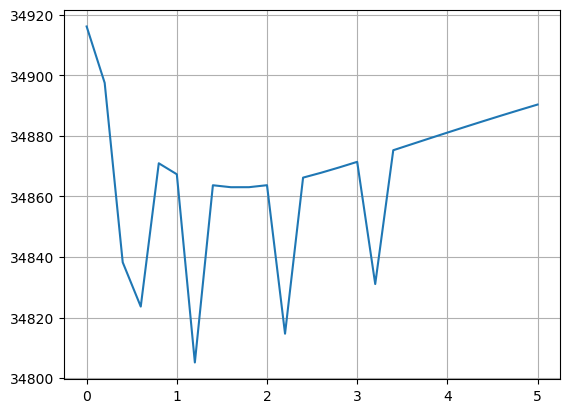

In [19]:
plt.plot(ebl_scale_range, stat)
plt.grid()

In [20]:
def plot_alpha_profile_stats(model_name, alpha_range, wstat):

    a_min = alpha_range[np.where(wstat == wstat.min())[0][0]]
    a_null = abs(alpha_range-1)

    w_1 = wstat[np.where(a_null == a_null.min())][0]
    w_0 = wstat[0]
    w_min = wstat[np.where(alpha_range == a_min)][0]

    y_range = wstat.max() - wstat.min()
    y_pos = wstat.min() + round(y_range*0.8, 2)
    pval = 2 * norm.sf(abs(w_1-w_min))

    text = (
        (f"-2ln(L_min) is at alpha={a_min:.3e}\n" +
        "|-2ln(L_min/L_(alpha=1))| =" + f"{round(abs(w_1-w_min), 4)}\n" +
        "-2ln(L_min/L_(alpha=0)) ="+f" {round(abs(w_min-w_0), 4)} " +
        f"p-value(alpha @ L_min vs alpha=1) = {pval:.3e}")
    )

    plt.plot(alpha_range, wstat)
    plt.scatter(alpha_range, wstat, lw=0.5, alpha=0.7, marker="*")

    plt.axvline(a_min, ls="--", alpha=0.5)
    plt.text(1, y_pos, text)
    plt.axhline(wstat.min())

    plt.grid(which="both")
    plt.xlabel("EBL Alpha")

    plt.title(f"Log-likelihood profile of EBL alpha\nfor intrinsic spectral model: {model_name}")
    plt.ylabel(f"Wstat (-2 ln L)")


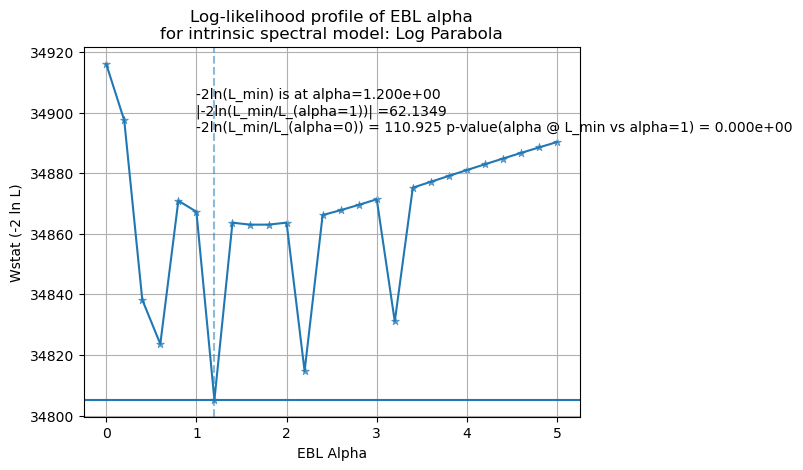

In [21]:
plot_alpha_profile_stats("Log Parabola", ebl_scale_range, stat)